# Data Structures in Python

This notebook demonstrates various data structures available in Python, including lists, tuples, sets, dictionaries, and more.


## Strings

- Creation: Strings can be defined using single quotes (' '), double quotes (" "), or triple quotes (''' ''' or """ """) for multi-line strings.

- **Immutability**: Once created, the characters in a string cannot be changed. Instead, operations on strings produce new strings.

- Indexing and Slicing: Like other sequences, you can access individual characters using indices (starting at 0) and extract parts of a string using slicing.

- Methods: Python provides many built-in methods to manipulate strings (e.g., .lower(), .upper(), .strip(), .replace(), and more).

- Concatenation and Formatting: Strings can be combined with the + operator, and formatted using f-strings (formatted string literals) or the format() method.

In [5]:
def can_be_equal_with_one_swap(s1, s2):
    if len(s1) != len(s2):
        return False
    
    # Find the indices where the characters differ
    diff = [(a, b) for a, b in zip(s1, s2) if a != b]
    
    # If there are no differences, the strings are already equal
    if not diff:
        return True
    
    # If there are exactly two differences, check if swapping them makes the strings equal
    if len(diff) == 2 and diff[0] == diff[1][::-1]:
        return True
    
    return False

s = "ban"
s2 = "bank"
# Test the function using the given variables s and s2
print(can_be_equal_with_one_swap(s, s2))  # Output: True

False


In [3]:
[(a, b) for a, b in zip(s, s2) if a != b]

[('b', 'k'), ('k', 'b')]

### One distance edit 

Given two strings s and t, return true if they are both one edit distance apart, otherwise return false.

A string s is said to be one distance apart from a string t if you can:

Insert exactly one character into s to get t.
Delete exactly one character from s to get t.
Replace exactly one character of s with a different character to get t.

In [20]:
def is_one_edit_distance(s: str, t: str) -> bool:
    # Early exit if length difference is more than 1
    if abs(len(s) - len(t)) > 1:
        return False

    # Ensure s is the shorter (or same length) string
    if len(s) > len(t):
        s, t = t, s

    i = j = 0
    found_difference = False

    while i < len(s) and j < len(t):
        if s[i] != t[j]:
            if found_difference:
                return False
            found_difference = True

            # If lengths differ, advance only the longer string pointer
            if len(s) < len(t):
                j += 1
                continue
        i += 1
        j += 1

    # If we’ve used up all of s but t has one extra char left, it’s still valid
    return found_difference or (len(t) - j == 1)

In [21]:
s = "ac"
t = "acb"

In [22]:
is_one_edit_distance(s, t)

True

### Palindrome

Given a string s, return true if a permutation of the string could form a palindrome and false otherwise.

In [26]:
s = "aabbcc" # -> "acbbca"

In [27]:
def can_form_palindrome(s: str) -> bool:
    freq = {}
    for char in s:
        freq[char] = freq.get(char, 0) + 1 #default value is 0

    odd_count = sum(1 for count in freq.values() if count % 2 != 0)
    return odd_count <= 1, freq

In [29]:
result, freq = can_form_palindrome(s)
freq,result

({'a': 2, 'b': 2, 'c': 2}, True)

How many combinations is possible?

In [40]:
def generate_permutations(half, path, used, res):
    if len(path) == len(half):
        res.append(''.join(path))
        return
    for i in range(len(half)):
        if used[i]:
            continue
        # Skip duplicate characters
        if i > 0 and half[i] == half[i - 1] and not used[i - 1]:
            continue
        used[i] = True
        path.append(half[i])
        generate_permutations(half, path, used, res)
        path.pop()
        used[i] = False

def generate_palindromes(s: str):
    from collections import Counter
    count = Counter(s)
    mid = ""
    half = []
    
    # Check if more than one odd count character exists
    for ch, cnt in count.items():
        if cnt % 2 == 1:
            if mid:  # Already have one odd element
                return []
            mid = ch
        half.extend(ch * (cnt // 2)) # add half of the characters to the half list -> Counter({'a': 2, 'b': 2}) -> ['a', 'b']
    
    half = sorted(half)
    permutations = []
    used = [False] * len(half)
    generate_permutations(half, [], used, permutations)
    
    palindromes = []
    for perm in set(permutations):
        palindromes.append(perm + mid + perm[::-1])
    
    return palindromes

# Example usage:
if __name__ == "__main__":
    s1 = "aabb"
    s2 = "abaac"
    print("Input:", s1, "->", generate_palindromes(s1))
    print("Input:", s2, "->", generate_palindromes(s2))


Input: aabb -> ['abba', 'baab']
Input: abaac -> []


In [41]:
4//2

2

### Add Bold Tag in String Medium


You should add a closed pair of bold tag <b> and </b> to wrap the substrings in s that exist in words.

If two such substrings overlap, you should wrap them together with only one pair of closed bold-tag. If two substrings wrapped by bold tags are consecutive, you should combine them. Return s after adding the bold tags.


In [53]:
def addBoldTag(s: str, words) -> str:
    intervals = []
    # Find all intervals where any word is a substring of s.
    for word in words:
        start = s.find(word)
        while start != -1:
            intervals.append((start, start + len(word))) # if I found the word, I will add the start and end index to the intervals list
            start = s.find(word, start + 1)

    # If no intervals are found, return the string as is.
    if not intervals:
        return s

    # Sort intervals by start index.
    intervals.sort(key=lambda x: x[0])
    
    # Merge overlapping or consecutive intervals.
    merged = [intervals[0]]

    for curr in intervals[1:]:
        prev = merged[-1]
        # Check if intervals overlap or are adjacent.
        if curr[0] <= prev[1]:
            merged[-1] = (prev[0], max(prev[1], curr[1]))
        else:
            merged.append(curr)
    # Build the resulting string with bold tags.
    result = []
    prev_end = 0
    for start, end in merged:
        # Add text before current bold interval.
        result.append(s[prev_end:start])
        # Add bold tags around the interval.
        result.append("<b>" + s[start:end] + "</b>")
        prev_end = end
    # Append the remaining text after the last interval.
    result.append(s[prev_end:])
    
    return "".join(result)

# Example usage:
if __name__ == "__main__":
    s = "aaaaxyz123"
    words = ["aa", "123"]
    print(addBoldTag(s, words))  # Expected: "<b>abc</b>xyz<b>123</b>"

<b>aaaa</b>xyz<b>123</b>


## List

A list is a collection which is ordered and changeable. Allows duplicate members.


Sets and lists both have their own advantages. 

- Sets are optimal when you need fast membership testing and uniqueness, as they offer average O(1) lookup time and automatically eliminate duplicate values. 

- In contrast, lists preserve order and allow duplicates, making them ideal when the sequence of elements matters. The choice depends on your specific needs in terms of order, performance, and uniqueness requirements.



- Lists support indexing and slicing to access individual items or sublists.
- They are mutable, allowing modifications such as element assignment.
- You can concatenate lists with the + operator and repeat them using the * operator.
- Built-in methods like append(), insert(), remove(), pop(), reverse(), and sort() facilitate common list operations.
- Lists can contain mixed data types, including other lists (nested lists).
- List comprehensions provide a concise way to generate new lists based on existing iterables.


In [66]:
# Let's perform some common list operations.
# Here, we are using the pre-defined list "words" which is ['aa', '123'].

words = ['aa', '123']

# Create a copy of words to work with
ops_list = words.copy()
print("Initial list:", ops_list)

# Append a new element
ops_list.append("new")
print("After append:", ops_list)

# Insert an element at index 1
ops_list.insert(1, "inserted")
print("After insert at index 1:", ops_list)

# Remove an element (first occurrence) 
ops_list.remove("aa")
print("After removing 'aa':", ops_list)

# Pop an element from the end
popped = ops_list.pop()
print("Popped element:", popped)
print("List after pop:", ops_list)

# Reverse the list in-place
ops_list.reverse()
print("After reverse:", ops_list)

# Sort the list (alphabetically)
ops_list.sort()
print("After sorting:", ops_list)

Initial list: ['aa', '123']
After append: ['aa', '123', 'new']
After insert at index 1: ['aa', 'inserted', '123', 'new']
After removing 'aa': ['inserted', '123', 'new']
Popped element: new
List after pop: ['inserted', '123']
After reverse: ['123', 'inserted']
After sorting: ['123', 'inserted']


In [98]:
# Creating a list
my_list = [1, 2, 3, 4, 5]
print("List:", my_list)

# Accessing elements
print("First element:", my_list[0])

# Modifying elements
my_list[2] = 10
print("Modified list:", my_list)

my_list.append(6)
print("Appended list:", my_list)

my_list.insert(2, 7)
print("Inserted list:", my_list)

my_list.remove(7)
print("Removed list:", my_list)

my_list.pop(2)
print("Popped list index 2:", my_list)  

my_list.pop()
print("Popped list:", my_list)  

my_list.reverse()
print("Reversed list:", my_list)

my_list.sort(key=None, reverse=False)
print("Sorted list:", my_list)

print("Count of 5:", my_list.count(5))


print("Index of 5:", my_list.index(5))


#my_list.clear()

print(my_list)

List: [1, 2, 3, 4, 5]
First element: 1
Modified list: [1, 2, 10, 4, 5]
Appended list: [1, 2, 10, 4, 5, 6]
Inserted list: [1, 2, 7, 10, 4, 5, 6]
Removed list: [1, 2, 10, 4, 5, 6]
Popped list index 2: [1, 2, 4, 5, 6]
Popped list: [1, 2, 4, 5]
Reversed list: [5, 4, 2, 1]
Sorted list: [1, 2, 4, 5]
Count of 5: 1
Index of 5: 3
[1, 2, 4, 5]


In the worst case, if you need to insert an element at the beginning or in the middle of the array, you may have to shift other elements to make space for the new element, which takes O(n) time (where n is the number of elements in the array).

In [100]:
my_list.insert(2, 10)  # Insert 10 at index 2

print(my_list)  # Output: [1, 2, 10, 3, 4, 5]


[1, 2, 10, 10, 4, 5]


### Find complement of a number in a list

In [70]:
def twoSum(nums, target):
    # Dictionary to store the value and its corresponding index
    num_map = {}
    
    # Iterate over the nums array
    for i, num in enumerate(nums):
        complement = target - num
        
        # If the complement exists in the dictionary, return the indices
        if complement in num_map:
            return [num_map[complement], i]
        
        # Otherwise, add the current number and its index to the dictionary
        num_map[num] = i


## Nested List

Multi-Level Structure:
Each element of a nested list can be another list, and those lists can contain further nested lists, creating multiple layers of data.

Accessing Elements:
To access an element, you need to use multiple indices. For example, in a 2-dimensional nested list (a matrix), you use the first index for the row and the second index for the column.

Common Use Cases:
Nested lists are often used to represent:

Matrices (2D arrays)
Grids (like a chess board)
Trees and other hierarchical data structures


- O(1)




In [73]:
MyList = [[22, 14, 16], ["Joe", "Sam", "Abel"], [True, False, True]]

In [74]:
for objects in MyList:
    print(id(objects))

4666742976
4666114880
4666336064


In [75]:
MyList = [[]] * 5

In [76]:
MyList[1].append(7)
print(MyList)

[[7], [7], [7], [7], [7]]


## Set
A set is a collection which is unordered, unchangeable*, and unindexed. No duplicate members.


- Uniqueness:
    Sets automatically remove duplicates. Every element in a set is unique.

- Unordered:
    Elements in a set do not have a fixed order. Display order may vary and does not reflect insertion order (prior to Python 3.7, though insertion order is preserved in regular dictionaries and sets in CPython 3.7+, it's not a guaranteed language feature).

- Mutable:
    You can add or remove elements after a set is created. However, the elements themselves must be immutable (e.g., numbers, strings, tuples).

- Efficient Membership Testing:
    Checking if an element is in a set is very fast (average O(1) time complexity).

- Set Operations:
    Sets provide mathematical operations like union, intersection, difference, and symmetric difference:

union(set2) or set1 | set2

intersection(set2) or set1 & set2

difference(set2) or set1 - set2

symmetric_difference(set2) or set1 ^ set2

In [77]:
my_set = {1, 2, 3, 4, 5}
print("Set:", my_set)

my_set.add(6)
print("Set after adding an element:", my_set)

my_set.remove(3)
print("Set after removing an element:", my_set)

Set: {1, 2, 3, 4, 5}
Set after adding an element: {1, 2, 3, 4, 5, 6}
Set after removing an element: {1, 2, 4, 5, 6}


In [78]:
# Creating a set with duplicate elements - the duplicates are removed
my_set = {1, 2, 2, 3, 4, 3}
print(my_set)  # Output might be: {1, 2, 3, 4}

# Adding and removing elements
my_set.add(5)        # Now my_set is {1, 2, 3, 4, 5}
my_set.remove(3)     # Removes element 3 if it exists

# Checking membership (fast lookup)
if 2 in my_set:
    print("2 is in my_set")

# Set operations
set_a = {1, 2, 3}
set_b = {3, 4, 5}

# Union
print(set_a | set_b)  # Output: {1, 2, 3, 4, 5}

# Intersection
print(set_a & set_b)  # Output: {3}

# Difference
print(set_a - set_b)  # Output: {1, 2}

# Symmetric Difference
print(set_a ^ set_b)  # Output: {1, 2, 4, 5}

{1, 2, 3, 4}
2 is in my_set
{1, 2, 3, 4, 5}
{3}
{1, 2}
{1, 2, 4, 5}


## Tuple
A tuple is a collection which is ordered and unchangeable. Allows duplicate members.

- immutable: dont support in-place mutations
- lightweight
- Heterogeneous: They can store objects of different data types and domains, including mutable objects.
- Nestable: They can contain other tuples, so you can have tuples of tuples.
- Iterable: They support iteration, so you can traverse them using a loop or comprehension while you perform operations with each of their elements.
- Sliceable: They support slicing operations, meaning that you can extract a series of elements from a tuple.
- Combinable: They support concatenation operations, so you can combine two or more tuples using the concatenation operators, which creates a new tuple.
- Hashable: They can work as keys in dictionaries when all the tuple items are immutable.


- augmented conct operator works
- + operator works
- repeating with *



In [79]:
# To create a tuple with a single item, you need to place the item followed by a comma

one_number = (43,)
one_number

(43,)

In [80]:
one_number.count(43)

1

In [82]:
one_number[1] = "new"

TypeError: 'tuple' object does not support item assignment

In [81]:
tuple(["Pythonista"])


('Pythonista',)

In [82]:
numbers = (1, 2, 3, 4, 5)
first, *middle, last = numbers

middle

[2, 3, 4]

In [92]:
numbers[::-1]

(5, 4, 3, 2, 1)

In [83]:
from copy import copy, deepcopy
student_info = ("Linda", 18, ["Math", "Physics", "History"])
student_profile = copy(student_info)

id(student_info) == id(student_profile)

True

In [84]:
student_profile_deep = deepcopy(student_info)
id(student_profile_deep) == id(student_profile)

False

### Count valid pairs with equal products

In [96]:
from collections import defaultdict

def countTuples(nums):
    product_pairs = {} # or with defaultdict: product_pairs = defaultdict(int)
    n = len(nums)
    
    # Count pairs by product (only unique pairs since nums has distinct elements)
    for i in range(n):
        for j in range(i+1, n): # to avoid duplicates
            product_pairs[nums[i] * nums[j]] = product_pairs.get(nums[i] * nums[j], 0) + 1 #default value is 0
            #product_pairs.get([nums[i] * nums[j]]) += 1

    total = 0
    # For each product, if there are k pairs, we can form 8 * (k choose 2) valid tuples -> binomial coefficient
    for count in product_pairs.values():
        if count >= 2:
            total += 8 * (count * (count - 1) // 2)
    return total, product_pairs

# Example usage:
nums_ex = [2, 3, 4, 6]
print("Number of valid tuples:", countTuples(nums_ex))

Number of valid tuples: (8, {6: 1, 8: 1, 12: 2, 18: 1, 24: 1})


## Hashable Obj

- A hashable object is an object that has a hash value that never changes during its lifetime

print("Immutable object's hash value:")
print("hash(cnt):", hash(cnt))
print("hash(s):", hash(s))


In [97]:
print("Hashing a mutable object like MyList raises an error:")
try:
    print(hash(MyList))
except TypeError as e:
    print("Error hashing MyList:", e)

Hashing a mutable object like MyList raises an error:
Error hashing MyList: unhashable type: 'list'


## Stack

A stack is a collection which follows the Last In First Out (LIFO) principle.

- Supports push (insertion), pop (removal), and peek (inspect top element) operations.
- Typically implemented in Python using a list with O(1) time complexity for push and pop.
- Follows a Last In First Out (LIFO) principle, making the most recently added item the first to be removed.
- Commonly used in recursion, backtracking, and expression evaluation.
- Can be extended to include utility functions such as isEmpty and size.


In [101]:

stack = []
stack.append(1)
stack.append(2)
stack.append(3)
print("Stack:", stack)

# Popping elements
print("Popped element:", stack.pop())
print("Stack after popping an element:", stack)


Stack: [1, 2, 3]
Popped element: 3
Stack after popping an element: [1, 2]


#### Valid parameters

Given a string s containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.

An input string is valid if:

- Open brackets must be closed by the same type of brackets.
- Open brackets must be closed in the correct order.
- Every close bracket has a corresponding open bracket of the same type.




In [107]:
def isValid(s: str) -> bool:
    # Mapping of closing brackets to their corresponding opening brackets.
    bracket_map = {')': '(', '}': '{', ']': '['}
    stack = []
    
    for char in s:
        if char in bracket_map.values():
            # If it's an opening bracket, push it onto the stack.
            stack.append(char)
        elif char in bracket_map:
            # If it's a closing bracket, check for a matching opening bracket.
            if not stack or stack.pop() != bracket_map[char]:
                return False
        else:
            # In case there are any other characters, they can be ignored or handled.
            return False
            
    # At the end, the stack should be empty if all brackets matched.
    return not stack

In [108]:
# Example usage:
if __name__ == "__main__":
    test_strings = [
        "()",           # True
        "()[]{}",       # True
        "(]",           # False
        "([)]",         # False
        "{[]}",         # True
        ".",             # True (an empty string is valid)
    ]

    for s in test_strings:
        print(f"{s!r}: {isValid(s)}")

'()': True
'()[]{}': True
'(]': False
'([)]': False
'{[]}': True
'.': False


#### Longest Valid Parentheses

Given a string containing just the characters '(' and ')', return the length of the longest valid (well-formed) parentheses 
substring


In [109]:
def longestValidParentheses(s: str) -> int:
    max_length = 0
    # Initialize stack with -1 to help with length calculations
    stack = [-1]
    
    for i, char in enumerate(s):
        if char == '(':
            stack.append(i)
        else:  # char == ')'
            # Pop from the stack
            stack.pop()
            # If stack is empty, push current index; else update max_length
            if not stack:
                stack.append(i)
            else:
                max_length = max(max_length, i - stack[-1])
    return max_length

# Test the function using the existing variable s
s = "(((())"
print(longestValidParentheses(s))



4


#### Trapping Rain Water

Given n non-negative integers representing an elevation map where the width of each bar is 1, compute how much water it can trap after raining.

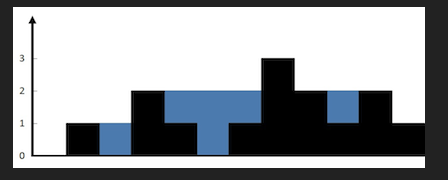

In [116]:
def trap(height):
    if not height:
        return 0

    left, right = 0, len(height) - 1
    left_max, right_max = height[left], height[right]
    water = 0

    while left < right:
        
        if left_max < right_max:
            left += 1
            left_max = max(left_max, height[left])
            water += left_max - height[left]
        else:
            right -= 1
            right_max = max(right_max, height[right])
            water += right_max - height[right]
    return water

# Example usage:
elevation = [0,1,0,2,1,0,1,3,2,1,2,1]
print("Trapped water:", trap(elevation))

Trapped water: 6


#### Simplify path

In [117]:

def simplify_path(path):
    # Split the path by '/' to process each part
    parts = path.split('/')
    print(parts)
    stack_path = []
    
    for part in parts:
        if part == '' or part == '.':
            # Skip empty parts and current directory tokens
            continue
        elif part == '..':
            # Go up to the parent directory if possible
            if stack_path:
                stack_path.pop()
        else:
            # Normal directory/file names (e.g., '...' is valid)
            stack_path.append(part)
    
    # Assemble the canonical path. Root is '/' if no parts remain.
    return '/' + '/'.join(stack_path)

# Use the given variable s as the input path


s = "/home//user/Documents/../Pictures"
canonical_path = simplify_path(s)
print(canonical_path)

    
    
    

['', 'home', '', 'user', 'Documents', '..', 'Pictures']
['home', 'user', 'Documents']
/home/user/Pictures


### Max Histogram area

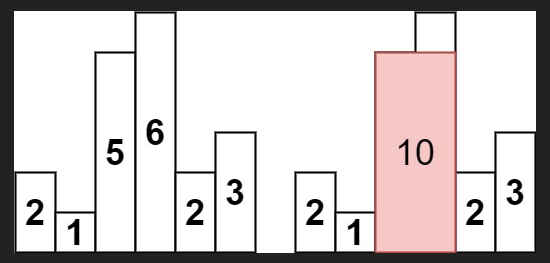



In [127]:
def largestRectangleArea(heights):
    stack = []
    max_area = 0
    # Append a zero height to force calculation of remaining bars
    heights.append(0)
    
    for i, h in enumerate(heights):
        while stack and h < heights[stack[-1]]:
            height = heights[stack.pop()]
            width = i if not stack else i - stack[-1] - 1
            max_area = max(max_area, height * width)
        stack.append(i)
    
    # Restore the original list if necessary
    heights.pop()
    print("Largest rectangle area:", max_area)

    return max_area


In [128]:
heights = [2,1,5,6,2,3]
largestRectangleArea(heights)

Largest rectangle area: 10


10

### Matrix

Given a rows x cols binary matrix filled with 0's and 1's, find the largest rectangle containing only 1's and return its area.

In [135]:
matrix = [["1","0","1","0","0"],["1","0","1","1","1"],["1","1","1","1","1"],["0","0","0","0","0"]]

In [136]:
def largestRectangleAreaHistogram(heights):
    stack = []
    max_area = 0
    # Append a sentinel value
    for i, h in enumerate(heights + [0]):
        while stack and h < heights[stack[-1]]:
            height = heights[stack.pop()]
            width = i if not stack else i - stack[-1] - 1
            max_area = max(max_area, height * width)
        stack.append(i)
    return max_area

def maximalRectangle(matrix):
    if not matrix or not matrix[0]:
        return 0
    
    max_area = 0
    n = len(matrix[0])
    heights = [0] * n
    
    for row in matrix:
        for j in range(n):
            # Convert string values to integers for calculation
            heights[j] = heights[j] + 1 if row[j] == '1' else 0
        max_area = max(max_area, largestRectangleAreaHistogram(heights))
    return max_area

# Test with the pre-defined 'matrix' variable
area = maximalRectangle(matrix)
print("The area of the largest rectangle is:", area)


The area of the largest rectangle is: 6


### Max Stack


Design a max stack data structure that supports the stack operations and supports finding the stack's maximum element.


MaxStack() Initializes the stack object.
void push(int x) Pushes element x onto the stack.
int pop() Removes the element on top of the stack and returns it.
int top() Gets the element on the top of the stack without removing it.
int peekMax() Retrieves the maximum element in the stack without removing it.
int popMax() Retrieves the maximum element in the stack and removes it. If there is more than one maximum element, only remove the top-most one.
You must come up with a solution that supports O(1) for each top call and O(logn) for each other call.

 

Example 1:

Input
["MaxStack", "push", "push", "push", "top", "popMax", "top", "peekMax", "pop", "top"]
[[], [5], [1], [5], [], [], [], [], [], []]

In [ ]:
import bisect

# Doubly linked list node.
class Node:
    def __init__(self, val: int):
        self.val = val
        self.prev = None
        self.next = None

class MaxStack:
    def __init__(self):
        # Initialize dummy head and tail to form our doubly linked list.
        self.head = Node(0)
        self.tail = Node(0)
        self.head.next = self.tail
        self.tail.prev = self.head
        
        # Dictionary mapping each value to the list of nodes (instances) with that value.
        self.val_to_nodes = {}
        
        # A sorted list of the unique keys currently in the stack.
        self.sorted_keys = []
        
    def push(self, x: int) -> None:
        # Create a new node.
        node = Node(x)
        # Append to the tail (stack's top) of the doubly linked list.
        node.prev = self.tail.prev
        node.next = self.tail
        self.tail.prev.next = node
        self.tail.prev = node
        
        # Add node to our dictionary.
        if x in self.val_to_nodes:
            self.val_to_nodes[x].append(node)
        else:
            self.val_to_nodes[x] = [node]
            # Insert x in sorted order.
            bisect.insort(self.sorted_keys, x)
    
    def pop(self) -> int:
        # Remove and return the top element.
        if self.head.next == self.tail:
            return None  # Empty stack.
        node = self.tail.prev
        self._remove_from_linked_list(node)
        
        # Remove node from dictionary.
        nodes_list = self.val_to_nodes[node.val]
        for i, n in enumerate(nodes_list):
            if n is node:
                nodes_list.pop(i)
                break
        # If no more nodes with this value, remove the key.
        if not nodes_list:
            idx = bisect.bisect_left(self.sorted_keys, node.val)
            self.sorted_keys.pop(idx)
            del self.val_to_nodes[node.val]
        return node.val
    
    def top(self) -> int:
        # Return the value at the top of the stack.
        return self.tail.prev.val if self.head.next != self.tail else None
    
    def peekMax(self) -> int:
        # The max is the last element in our sorted keys.
        return self.sorted_keys[-1] if self.sorted_keys else None
    
    def popMax(self) -> int:
        # Retrieve and remove the most recently pushed node of the maximum value.
        if not self.sorted_keys:
            return None
        max_val = self.sorted_keys[-1]
        nodes_list = self.val_to_nodes[max_val]
        node = nodes_list.pop()  # Pop the most recent node with max_val.
        self._remove_from_linked_list(node)
        if not nodes_list:
            self.sorted_keys.pop()  # Remove max_val from sorted_keys.
            del self.val_to_nodes[max_val]
        return max_val
    
    def _remove_from_linked_list(self, node: Node) -> None:
        # Remove node from doubly linked list.
        node.prev.next = node.next
        node.next.prev = node.prev

# Example usage:
if __name__ == "__main__":
    stk = MaxStack()
    stk.push(5)   # Stack: [5]
    stk.push(1)   # Stack: [5, 1]
    stk.push(5)   # Stack: [5, 1, 5]
    print("Top:", stk.top())         # Should print 5
    print("popMax:", stk.popMax())     # Removes the top-most max (5) -> returns 5
    print("Top after popMax:", stk.top())  # Now top is 1
    print("peekMax:", stk.peekMax())   # Should be 5 (remaining maximum)
    print("Pop:", stk.pop())           # Removes 1 -> returns 1
    print("Top:", stk.top())           # Now top returns 5

Top: 5
popMax: 5
Top after popMax: 1
peekMax: 5
Pop: 1
Top: 5


## Queue

A queue is a collection which follows the First In First Out (FIFO) principle.

- Follows the First In First Out (FIFO) principle where the first element added is the first to be removed.
- Uses operations such as enqueue (adding elements) and dequeue (removing elements).
- Typically implemented using collections.deque for efficient O(1) time complexity on both operations.
- Ideal for scenarios like task scheduling, buffering, and breadth-first traversal in algorithms.



In [139]:

from collections import deque

# Creating a queue
queue = deque([1, 2, 3])
print("Queue:", queue)

# Adding elements
queue.append(4)
print("Queue after adding an element:", queue)

# Removing elements
print("Removed element:", queue.popleft())
print("Queue after removing an element:", queue)

Queue: deque([1, 2, 3])
Queue after adding an element: deque([1, 2, 3, 4])
Removed element: 1
Queue after removing an element: deque([2, 3, 4])


### Implement Stack using Queues

In [140]:
from collections import deque

class MyStack:
    def __init__(self):
        # Two queues used to simulate stack operations
        self.q1 = deque()
        self.q2 = deque()

    def push(self, x: int) -> None:
        # Always push to q2 first
        self.q2.append(x)
        # Move all elements from q1 to q2
        while self.q1:
            self.q2.append(self.q1.popleft())
        # Swap the names so q1 has the new top
        self.q1, self.q2 = self.q2, self.q1

    def pop(self) -> int:
        return self.q1.popleft() if not self.empty() else None

    def top(self) -> int:
        return self.q1[0] if not self.empty() else None

    def empty(self) -> bool:
        return len(self.q1) == 0

In [141]:
# Your MyStack object will be instantiated and called as such:
x = ["MyStack","push","push","top","pop","empty"]
obj = MyStack()
obj.push(x)
param_2 = obj.pop()
param_3 = obj.top()
param_4 = obj.empty()

In [174]:
from collections import deque
dir(deque)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'appendleft',
 'clear',
 'copy',
 'count',
 'extend',
 'extendleft',
 'index',
 'insert',
 'maxlen',
 'pop',
 'popleft',
 'remove',
 'reverse',
 'rotate']

### NestedIterator

In [192]:
class NestedIterator:
    def __init__(self, nestedList):
        # Initialize the stack with the nested list in reverse order.
        self.stack = nestedList[::-1]

    def next(self) -> int:
        # Ensure the next integer exists.
        if not self.hasnext():
            raise StopIteration("No more elements")
        return self.stack.pop()

    def hasnext(self) -> bool:
        # Process the stack until the top is an integer.
        while self.stack:
            top = self.stack[-1]
            if isinstance(top, int):
                return True
            # Otherwise, pop the list and push its items in reverse order.
            self.stack.pop() 
            self.stack.extend(top[::-1])
        return False

# Example usage:
nestedList = [[1, [2, 3]], 4, [5, [6]]]
i = NestedIterator(nestedList)
result = []
while i.hasnext():
    result.append(i.next())
print(result)  # Expected output: [1, 2, 3, 4, 5, 6]

[[2, 3], 1]
[3, 2]
[[6], 5]
[6]
[1, 2, 3, 4, 5, 6]


### Design Circular Queue

Design your implementation of the circular queue. The circular queue is a linear data structure in which the operations are performed based on FIFO (First In First Out) principle, and the last position is connected back to the first position to make a circle. It is also called "Ring Buffer".

One of the benefits of the circular queue is that we can make use of the spaces in front of the queue. In a normal queue, once the queue becomes full, we cannot insert the next element even if there is a space in front of the queue. But using the circular queue, we can use the space to store new values.



In [198]:
class MyCircularQueue:
    def __init__(self, k: int):
        self.capacity = k
        self.queue = [0] * k
        self.front = 0
        self.count = 0
        self.rear = -1

    def enQueue(self, value: int) -> bool:
        if self.isFull():
            return False
        self.rear = (self.rear + 1) % self.capacity
        self.queue[self.rear] = value
        self.count += 1
        return True

    def deQueue(self) -> bool:
        if self.isEmpty():
            return False
        self.front = (self.front + 1) % self.capacity
        self.count -= 1
        return True

    def Front(self) -> int:
        if self.isEmpty():
            return -1
        return self.queue[self.front]

    def Rear(self) -> int:
        if self.isEmpty():
            return -1
        return self.queue[self.rear]

    def isEmpty(self) -> bool:
        return self.count == 0

    def isFull(self) -> bool:
        return self.count == self.capacity

# Example usage:
if __name__ == "__main__":
    cq = MyCircularQueue(3)
    print("enQueue 1:", cq.enQueue(1))  # True
    print("enQueue 2:", cq.enQueue(2))  # True
    print("enQueue 3:", cq.enQueue(3))  # True
    print("enQueue 4:", cq.enQueue(4))  # False, queue is full
    print("Front:", cq.Front())         # 1
    print("Rear:", cq.Rear())           # 3
    print("deQueue:", cq.deQueue())      # True
    print("enQueue 4:", cq.enQueue(4))  # True
    print("Front:", cq.Front())         # 2
    print("Rear:", cq.Rear())           # 4

enQueue 1: True
enQueue 2: True
enQueue 3: True
enQueue 4: False
Front: 1
Rear: 3
deQueue: True
enQueue 4: True
Front: 2
Rear: 4


## Binary Tree


https://www.geeksforgeeks.org/inorder-traversal-of-binary-tree/



- is a tree data structure where each node has at most two children: usually referred to as the left child and the right child. Binary trees are useful for various tasks such as searching, sorting, and representing hierarchical data.


- Nodes: The fundamental part of a binary tree, where each node contains data and link to two child nodes.

- Root: The topmost node in a tree is known as the root node. It has no parent and serves as the starting point for all nodes in the tree.

- Parent Node: A node that has one or more child nodes. In a binary tree, each node can have at most two children.

- Child Node: A node that is a descendant of another node (its parent).

- Leaf Node: A node that does not have any children or both children are null.

- Internal Node: A node that has at least one child. This includes all nodes except the root and the leaf nodes.

- Depth of a Node: The number of edges from a specific node to the root node. The depth of the root node is zero.

- Height of a Binary Tree: The number of nodes from the deepest leaf node to the root node.


In [146]:
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.value = key

class BinaryTree:
    def __init__(self):
        self.root = None
    
    def insert(self, key):
        if self.root is None:
            self.root = Node(key)
        else:
            self._insert_recursively(self.root, key)
    
    def _insert_recursively(self, root, key):
        if key < root.value:
            if root.left is None:
                root.left = Node(key)
            else:
                self._insert_recursively(root.left, key)
        else:
            if root.right is None:
                root.right = Node(key)
            else:
                self._insert_recursively(root.right, key)

    def inorder_traversal(self):
        """Perform an inorder traversal (left, root, right) recursively 
        and return a list of node values."""
        result = []
        self._inorder_helper(self.root, result)
        return result

    def _inorder_helper(self, node, result):
        if node is None:
            return
        self._inorder_helper(node.left, result)
        result.append(node.value)
        self._inorder_helper(node.right, result)

    def inorder_traversal_iterative(self):
        """Perform an inorder traversal iteratively using a stack and return a list of node values."""
        result = []
        stack = []
        current = self.root

        while stack or current:
            while current:
                stack.append(current)
                current = current.left
            current = stack.pop()
            result.append(current.value)
            current = current.right

        return result
    
# Search for a target value in the BST
def bst_search(root, target):
    if root is None or root.value == target:
        return root
    return bst_search(root.left, target) if target < root.value else bst_search(root.right, target)



In [144]:
# Create binary tree and insert nodes from list
nodes = [20, 8, 22, 4, 12, 10, 14]
tree = BinaryTree()

for node in nodes:
    tree.insert(node)

# Print the tree using inorder traversal (sorted order)
print("Recursive Inorder Traversal:", tree.inorder_traversal())
print("Iterative Inorder Traversal:", tree.inorder_traversal_iterative())


4
8
10
12
14
20
22
Recursive Inorder Traversal: [4, 8, 10, 12, 14, 20, 22]
Iterative Inorder Traversal: [4, 8, 10, 12, 14, 20, 22]


In [149]:
bst_search(tree.root, 8).value

8

In [41]:

def upsideDownBinaryTree(root):
    if not root or not root.left:
        return root
    new_root = upsideDownBinaryTree(root.left)
    root.left.left = root.right
    root.left.right = root
    root.left = None
    root.right = None
    return new_root

new_root = upsideDownBinaryTree(tree.root)


In [44]:
new_root.value

4

### Heap


A heap is a specialized tree-based data structure that satisfies the heap property—every parent node is either less than or equal to (in a min-heap) or greater than or equal to (in a max-heap) its children. In Python, the heapq module provides an efficient implementation of a min-heap using a simple list.

This allows for operations such as heapify, heappush, heappop, and heapreplace, which are useful in building priority queues, efficiently finding the smallest (or largest) element, and scheduling tasks.

heapq.heapify(values)
print("Min-heap:", values)
heapq.heappush(values, 0)
print("After pushing 0:", values)
smallest = heapq.heappop(values)
print("Popped smallest element:", smallest)
print("Heap after pop:", values)

In [193]:
import heapq

def min_meeting_rooms(intervals):
    if not intervals:
        return 0

    intervals.sort(key=lambda x: x[0])
    heap = []
    for interval in intervals:
        if heap and interval[0] >= heap[0]:
            print("replace", interval[1])
            heapq.heapreplace(heap, interval[1])
            print(heap)
        else:
            print("push", interval[1])
            heapq.heappush(heap, interval[1])
    return len(heap), heap

In [194]:
intervals = [[0,30],[5,10],[15,20]]
min_meeting_rooms(intervals)

push 30
push 10
replace 20
[20, 30]


(2, [20, 30])

In [ ]:
# Creating a dictionary
my_dict = {"name": "Alice", "age": 25, "city": "New York"}
print("Dictionary:", my_dict)

# Accessing elements
print("Name:", my_dict["name"])

# Modifying elements
my_dict["age"] = 26
print("Modified dictionary:", my_dict)

### Linked List

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def append(self, data):
        new_node = Node(data)
        if not self.head:
            self.head = new_node
            return
        last = self.head
        while last.next:
            last = last.next
        last.next = new_node

    def print_list(self):
        current = self.head
        while current:
            print(current.data, end=" -> ")
            current = current.next
        print("None")

# Creating a linked list
ll = LinkedList()
ll.append(1)
ll.append(2)
ll.append(3)
print("Linked List:")
ll.print_list()